In [7]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

import mplfinance as mpf
import pandas as pd
import pandas_datareader.data as web

In [8]:
# Fetch data directly from yahoo finance(also can do for IEX, )

In [9]:
style.use('ggplot')

In [10]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [11]:
df = web.DataReader('TSLA','yahoo', start, end)

In [12]:
df.head() # adjust close is to split stock 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [13]:
# df plot

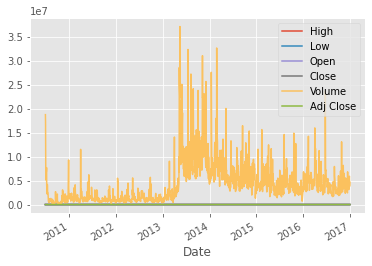

In [14]:
%matplotlib inline
df.plot()

In [15]:
df['100ma']=df['Adj Close'].rolling(window = 100).mean()

In [16]:
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876
...,...,...,...,...,...,...,...
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053


In [17]:
# graph everything in 2 subplot

<BarContainer object of 1640 artists>

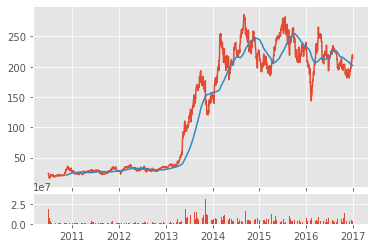

In [18]:
%matplotlib inline
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1, colspan = 1, sharex=ax1)

ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])


In [19]:
# resample data in different frequency in Panda

In [24]:
# generate the OHLC directly from a higher frequency data 
df_ohlc = df['Adj Close'].resample('10D').ohlc() # you can do mean, sum 

# generate the total volume traded in 10 days 
df_volume= df['Volume'].resample('10D').sum() # you can do mean, sum 

In [27]:
df_ohlc

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000
...,...,...,...,...
2016-11-14,181.449997,193.139999,181.449997,193.139999
2016-11-24,196.649994,196.649994,181.470001,181.470001
2016-12-04,186.800003,198.149994,185.850006,198.149994


In [33]:
# capitalize the previous data column to match the data required by mpf
df_ohlc.columns = [x.capitalize() for x in df_ohlc.columns]

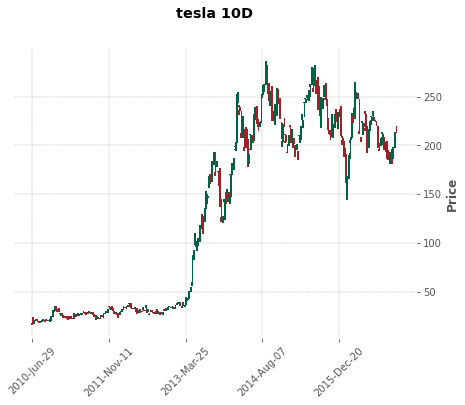

In [34]:
# plot the candle stick 
mpf.plot(df_ohlc, type='candle', style='charles',
            title='tesla 10D')